# Install and import libraries

In [1]:
!pip install whit-phys-util

     |████████████████████████████████| 10.1MB 475kB/s 


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
import scipy.constants as const
from scipy.constants import mu_0

# Connect to GitHub

In [37]:
repo = buc.local_repository("https://github.com/WhitworthPhysics/magnetic-force-part-2-CalvinMPayne")

Repository exists at this location. Pulling changes from GitHub.


# Equipment and materials
| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| fill in | fill in | fill in | fill in |
| fill in | fill in | fill in | fill in |


_You should replace the **fill in** entries with appropriate info._

# Theoretical Foundations

## Draw a qualitatively correct free body diagram for case B

## Write down Newton's second law for case B

## Draw a qualitatively correct free body diagram for case C

## Write down Newton's second law for case C

## Under what conditions would the magnetic force in case B equal the magnetic force in case C?

## Write an expression for the magnetic field gradient in terms of $m$, $M$, $g$, $k$, and $\Delta z$

## Explain **where** your expression for the magnetic field gradient is applicable

# Experiment measurements

In [4]:
mass=2.8/5
g=9.8

#Measuring the Spring Constant

In [41]:
df_spring=pd.read_table("mass_stretch_data.tsv")
df_spring

,Number of Bearings,Position (cm)
0,0,12.0
1,1,11.2
2,2,10.4
3,3,9.6
4,4,9.3
5,5,8.7


In [42]:
df_spring["Weight (mN)"]=g*mass*df_spring["Number of Bearings"]

In [43]:
fitTable, fitFunc = buc.prettyPolyFit(df_spring['Position (cm)'], df_spring['Weight (mN)'])
fitTable

,slope,intercept
value,-8.196364,97.322909
uncertainty,1.126921,11.565267


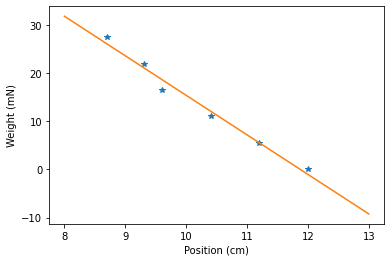

In [44]:
fig, ax = plt.subplots()
ax.plot(df_spring['Position (cm)'], df_spring['Weight (mN)'], "*")
ax.set_xlabel("Position (cm)");
ax.set_ylabel("Weight (mN)");
t_fit = np.linspace(8,13,2);
ax.plot(t_fit, fitFunc(t_fit));

#Measuring the Magnetic Dipole moment of the permanent magnet

In [28]:
z_0=6.626 #mm
N = 168
R = 0.07

In [11]:
df_dipole=pd.read_table("field_stretch_data.tsv")
df_dipole

,Current (A),Position (cm)
0,0.5,7.3
1,1.0,7.9
2,1.5,8.4
3,2.0,9.0
4,2.5,9.5
5,3.0,10.2


In [31]:
df_dipole["Delta z (cm)"]=df_dipole["Position (cm)"]-z_0

In [16]:
def B(I, z):
  z = z/100 # convert z in cm to m
  B_in_T = 0.5*mu_0*N*I*R**2/(z**2+R**2)**1.5
  return B_in_T*1000 # field in mT
def dB(I, z):
  z = z/100 # convert z in cm to m
  dB_in_T = (-0.5*mu_0*N*I)*(R*2*z/(z**2+R**2)**2.5)
  return dB_in_T*1000 # field in mT
def B_antihelmholtz(I,z):
  return B(I, z-3.5) + B(-I,z+3.5)
def dB_antihelmholtz(I,z):
  return dB(I, z-3.5) + dB(-I,z+3.5)

In [32]:
df_dipole["Mag Field Gradiant (T/cm)"]=dB_antihelmholtz(df_dipole["Current (A)"],df_dipole["Delta z"])
df_dipole

,Current (A),Position (cm),Delta z,Mag Field Gradiant (T/cm),Delta z (cm)
0,0.5,7.3,-58.96,-0.028020,0.674
1,1.0,7.9,-58.36,-0.058936,1.274
2,1.5,8.4,-57.86,-0.092231,1.774
3,2.0,9.0,-57.26,-0.129452,2.374
4,2.5,9.5,-56.76,-0.168955,2.874
5,3.0,10.2,-56.06,-0.215512,3.574


In [35]:
fitTable, fitFunc = buc.prettyPolyFit(df_dipole['Delta z (cm)'], df_dipole['Mag Field Gradiant (T/cm)'])
fitTable

,slope,intercept
value,-0.065569,0.021566
uncertainty,0.003709,0.008551


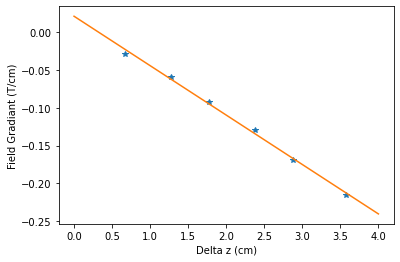

In [36]:
fig, ax = plt.subplots()
ax.plot(df_dipole['Delta z (cm)'], df_dipole['Mag Field Gradiant (T/cm)'], "*")
ax.set_xlabel("Delta z (cm)");
ax.set_ylabel("Field Gradiant (T/cm)");
t_fit = np.linspace(0,4,2);
ax.plot(t_fit, fitFunc(t_fit));

# Measuring the Mag Field Gradiant for a single coil

In [39]:
df_map=pd.read_table("field_map_data.tsv")
df_map

,z (cm),Rod with no field (cm),Rod with Field (cm)
0,4.0,10.54,10.57
1,4.5,10.93,11.70
2,5.0,11.56,12.52
3,5.5,12.08,13.35
4,6.0,12.66,14.01
5,6.5,13.03,14.01
6,7.0,13.64,15.30


In [40]:
df_map['Spring Stretch (cm)']=df_map["Rod with Field (cm)"]-df_map["Rod with no field (cm)"]